In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
#Percorso del file CSV
file_path = 'train.csv'

# Caricamneto dei dati nel DataFrame
macchine_data = pd.read_csv(file_path)

In [149]:
#le prime righe del DataFrame per confermare
print(macchine_data.head())

   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T  

In [128]:
print(macchine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None


In [129]:
print(macchine_data['accident'].unique())

['None reported' 'At least 1 accident or damage reported' nan]


In [130]:
print(macchine_data['clean_title'].unique())

['Yes' nan]


In [131]:
#conta valori nulli per ogni colonna
null_counts = macchine_data.isnull().sum()
print(null_counts)

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [132]:
print(macchine_data['price'].describe())

count    1.885330e+05
mean     4.387802e+04
std      7.881952e+04
min      2.000000e+03
25%      1.700000e+04
50%      3.082500e+04
75%      4.990000e+04
max      2.954083e+06
Name: price, dtype: float64


In [133]:
print(macchine_data['milage'].describe())

count    188533.000000
mean      65705.295174
std       49798.158076
min         100.000000
25%       24115.000000
50%       57785.000000
75%       95400.000000
max      405000.000000
Name: milage, dtype: float64


(array([ 2023., 12902., 34906., 63446., 55494., 14910.,  3817.,   794.,
           93.,   148.]),
 array([ 7.60090246,  8.3306821 ,  9.06046174,  9.79024137, 10.52002101,
        11.24980065, 11.97958029, 12.70935993, 13.43913956, 14.1689192 ,
        14.89869884]),
 <BarContainer object of 10 artists>)

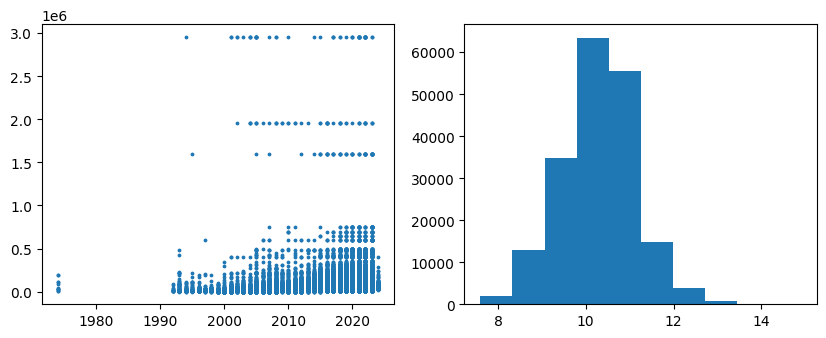

In [134]:
fig = plt.figure(figsize= (10, 8))

ax1 = fig.add_subplot(2,2,1)
ax1.scatter(macchine_data['model_year'], macchine_data['price'], s = 3)
ax2 = fig.add_subplot(2,2,2)
ax2.hist(np.log(macchine_data['price']))

Text(0, 0.5, 'Prezzo medio')

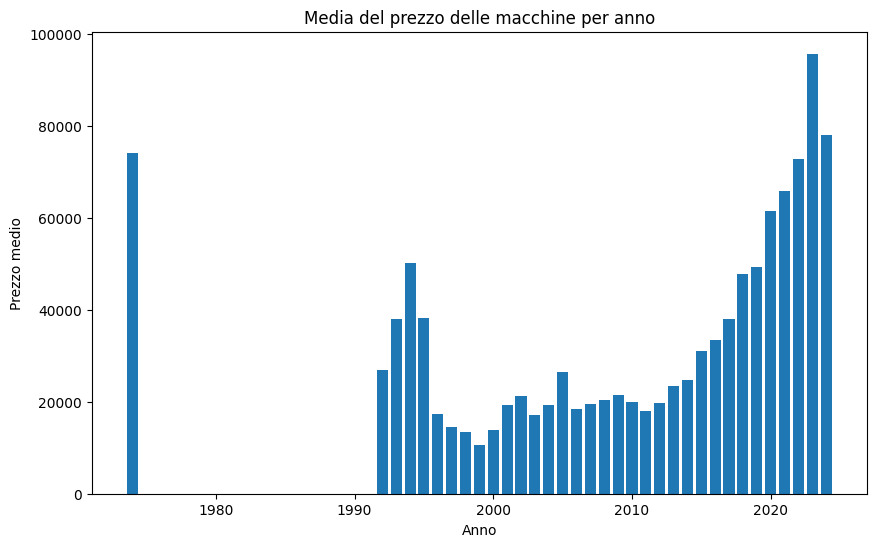

In [135]:
media_annuale = macchine_data.groupby('model_year')['price'].mean()

#std_annuale = macchine_data.groupby('model_year')['price'].std()

# print(media_annuale)

fig2 = plt.figure(figsize=(10, 6))

ax3 = fig2.add_subplot(1,1,1)

ax3.bar(media_annuale.index, media_annuale.values)

ax3.set_title('Media del prezzo delle macchine per anno')
ax3.set_xlabel('Anno')
ax3.set_ylabel('Prezzo medio')

Text(0, 0.5, 'Prezzo medio')

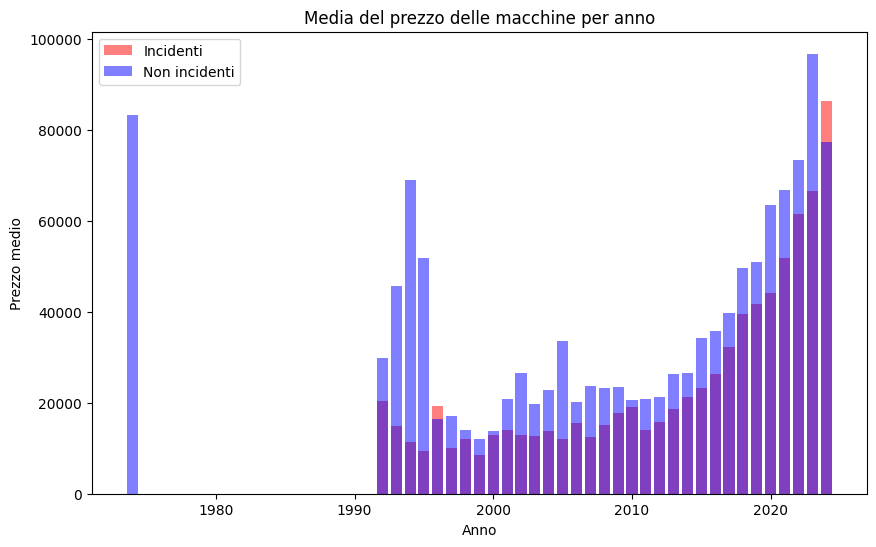

In [ ]:
media_annuale = macchine_data.groupby('model_year')['price'].mean()
media_annuale_incidentate = macchine_data[macchine_data["accident"] == "At least 1 accident or damage reported"].groupby('model_year')['price'].mean()
media_annuale_non_incidentate = macchine_data[macchine_data["accident"] == "None reported"].groupby('model_year')['price'].mean()


fig2 = plt.figure(figsize=(10, 6))

ax3 = fig2.add_subplot(1,1,1)



ax3.bar(media_annuale_incidentate.index, media_annuale_incidentate.values, label='Incidenti', color='red', alpha=0.5)
ax3.bar(media_annuale_non_incidentate.index, media_annuale_non_incidentate.values, label='Non incidenti', color='blue', alpha=0.5)

ax3.legend()
ax3.set_title('Media del prezzo delle macchine per anno')
ax3.set_xlabel('Anno')
ax3.set_ylabel('Prezzo medio')

                         Price
Kilometraggio                 
[100, 10100)      92237.899208
[10100, 20100)    73987.448219
[20100, 30100)    60086.636296
[30100, 40100)    52700.356805
[40100, 50100)    44666.841638
[50100, 60100)    37520.986934
[60100, 70100)    33728.210067
[70100, 80100)    30708.507243
[80100, 90100)    26577.184773
[90100, 100100)   22135.044028
[100100, 110100)  19043.335335
[110100, 120100)  18054.512863
[120100, 130100)  16469.132753
[130100, 140100)  14929.996242
[140100, 150100)  13408.299652
[150100, 160100)  13556.964141
[160100, 170100)  12732.007715
[170100, 180100)  12597.150788
[180100, 190100)  12450.432922
[190100, 200100)  11942.457510
[200100, 210100)  12440.631387
[210100, 220100)  12651.310714
[220100, 230100)  13333.007576
[230100, 240100)  17646.916981
[240100, 250100)  16093.234201
[250100, 260100)  18453.701754
[260100, 270100)  15422.548387
[270100, 280100)  14583.140000
[280100, 290100)  23986.363636
[290100, 300100)  28669.800000
[300100,

/var/folders/xx/f3mw_zd11yv2thln0zygp7hc0000gn/T/ipykernel_10473/2892139213.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kilometraggio_range = macchine_data.groupby('Kilometraggio').agg(
/var/folders/xx/f3mw_zd11yv2thln0zygp7hc0000gn/T/ipykernel_10473/2892139213.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(indici, rotation=90, size=5)


[Text(0, 0, '[100, 10100)'),
 Text(1, 0, '[10100, 20100)'),
 Text(2, 0, '[20100, 30100)'),
 Text(3, 0, '[30100, 40100)'),
 Text(4, 0, '[40100, 50100)'),
 Text(5, 0, '[50100, 60100)'),
 Text(6, 0, '[60100, 70100)'),
 Text(7, 0, '[70100, 80100)'),
 Text(8, 0, '[80100, 90100)'),
 Text(9, 0, '[90100, 100100)'),
 Text(10, 0, '[100100, 110100)'),
 Text(11, 0, '[110100, 120100)'),
 Text(12, 0, '[120100, 130100)'),
 Text(13, 0, '[130100, 140100)'),
 Text(14, 0, '[140100, 150100)'),
 Text(15, 0, '[150100, 160100)'),
 Text(16, 0, '[160100, 170100)'),
 Text(17, 0, '[170100, 180100)'),
 Text(18, 0, '[180100, 190100)'),
 Text(19, 0, '[190100, 200100)'),
 Text(20, 0, '[200100, 210100)'),
 Text(21, 0, '[210100, 220100)'),
 Text(22, 0, '[220100, 230100)'),
 Text(23, 0, '[230100, 240100)'),
 Text(24, 0, '[240100, 250100)'),
 Text(25, 0, '[250100, 260100)'),
 Text(26, 0, '[260100, 270100)'),
 Text(27, 0, '[270100, 280100)'),
 Text(28, 0, '[280100, 290100)'),
 Text(29, 0, '[290100, 300100)'),
 Text(30, 0

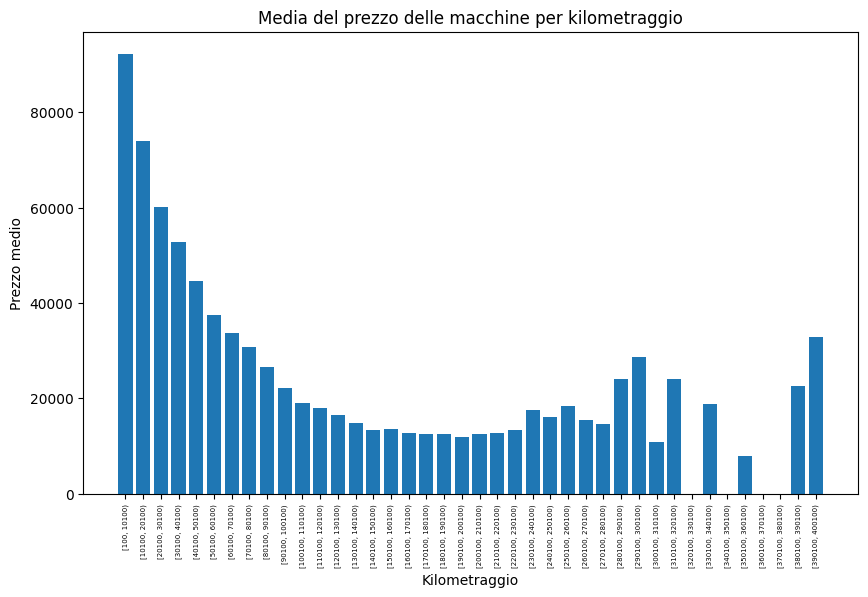

In [136]:
macchine_data['Kilometraggio'] = pd.cut(macchine_data['milage'], bins=range(100, 410000, 10000), right=False)

kilometraggio_range = macchine_data.groupby('Kilometraggio').agg(
Price=('price', 'mean'),
)

print(kilometraggio_range)

fig2 = plt.figure(figsize=(10, 6))

ax3 = fig2.add_subplot(1,1,1)

indici = []


for index, row in kilometraggio_range.iterrows():
    indici.append(str(row.name))

ax3.bar(indici, kilometraggio_range.Price.values)

ax3.set_title('Media del prezzo delle macchine per kilometraggio')
ax3.set_xlabel('Kilometraggio')
ax3.set_ylabel('Prezzo medio')
ax3.set_xticklabels(indici, rotation=90, size=5)




accident
At least 1 accident or damage reported    25334.071475
None reported                             49024.804144
Name: price, dtype: float64


<BarContainer object of 2 artists>

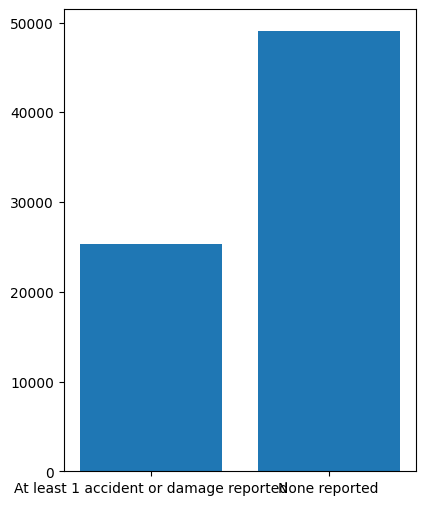

In [137]:
media_incidentate = macchine_data.groupby('accident')['price'].mean()

print(media_incidentate)

fig2 = plt.figure(figsize=(10, 6))

ax4 = fig2.add_subplot(1,2,2)

ax4.bar(media_incidentate.index, media_incidentate.values)




In [177]:
for index in range(len(macchine_data)):
    if 'HP' in macchine_data.loc[index,'engine']:
     #if macchine_data.loc[index,'engine'].split(' ')[0][0].isdigit():
      macchine_data.loc[index,'Hp'] = macchine_data.loc[index,'engine'].split('HP')[0]
    

#print(macchine_data['Hp'].unique())

In [178]:
macchine_data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Hp
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,NaN


In [179]:


macchine_data[macchine_data['Hp'] == ''] = 0
macchine_data['Hp'] = macchine_data['Hp'].astype(float)

#macchine_data['Hp'] = macchine_data['Hp'].astype(float)

In [180]:
macchine_data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Hp
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900,469.0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,NaN


In [181]:
# Drop unnecessary columns


#macchine_data = macchine_data.drop(['id','brand','model','fuel_type','engine','transmission','ext_col','int_col','Kilometraggio'], axis=1)

macchine_data['clean_title'] = macchine_data['clean_title'].map({'Yes': 1, np.nan: 0})

#macchine_data['accident'] = macchine_data['accident'].dropna()

macchine_data.dropna(subset=['accident'], inplace=True)
macchine_data.dropna(subset=['Hp'], inplace=True)

macchine_data['accident'] = macchine_data['accident'].map({'At least 1 accident or damage reported': 1, 'None reported': 0})



In [182]:
macchine_data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Hp
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,0,1,4200,172.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1,1,4999,252.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,0,1,13900,320.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,0,1,45000,420.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,0,1,97500,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188527,188527,Chevrolet,Camaro Z28,1999,110000,Gasoline,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,White,Gray,0,1,14500,310.0
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,0,1,27500,420.0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,1,1,30000,385.0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,0,1,86900,469.0


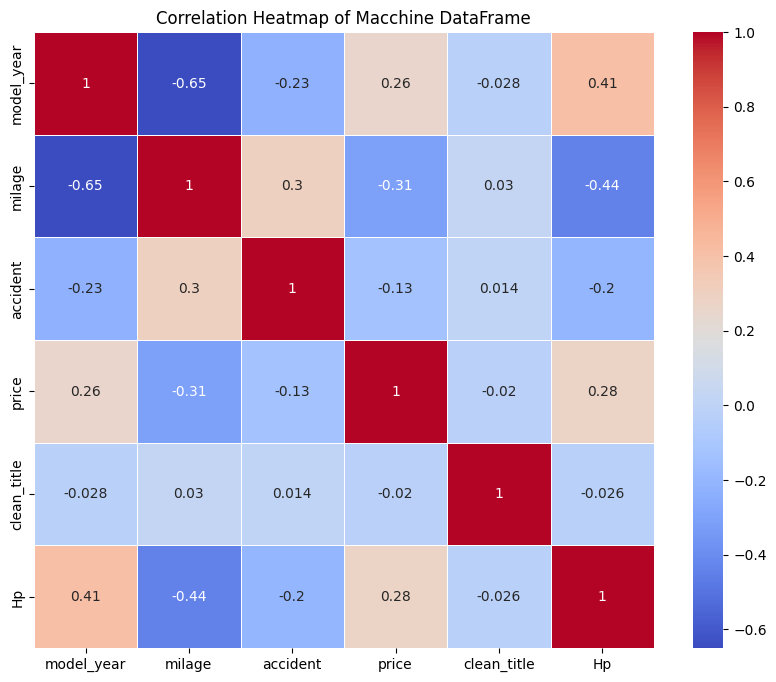

In [183]:
# Compute correlation matrix
lista = ['model_year', 'milage','accident', 'price', 'clean_title', 'Hp']
corr = macchine_data[lista].corr()

# Plotting Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Macchine DataFrame')
plt.show()


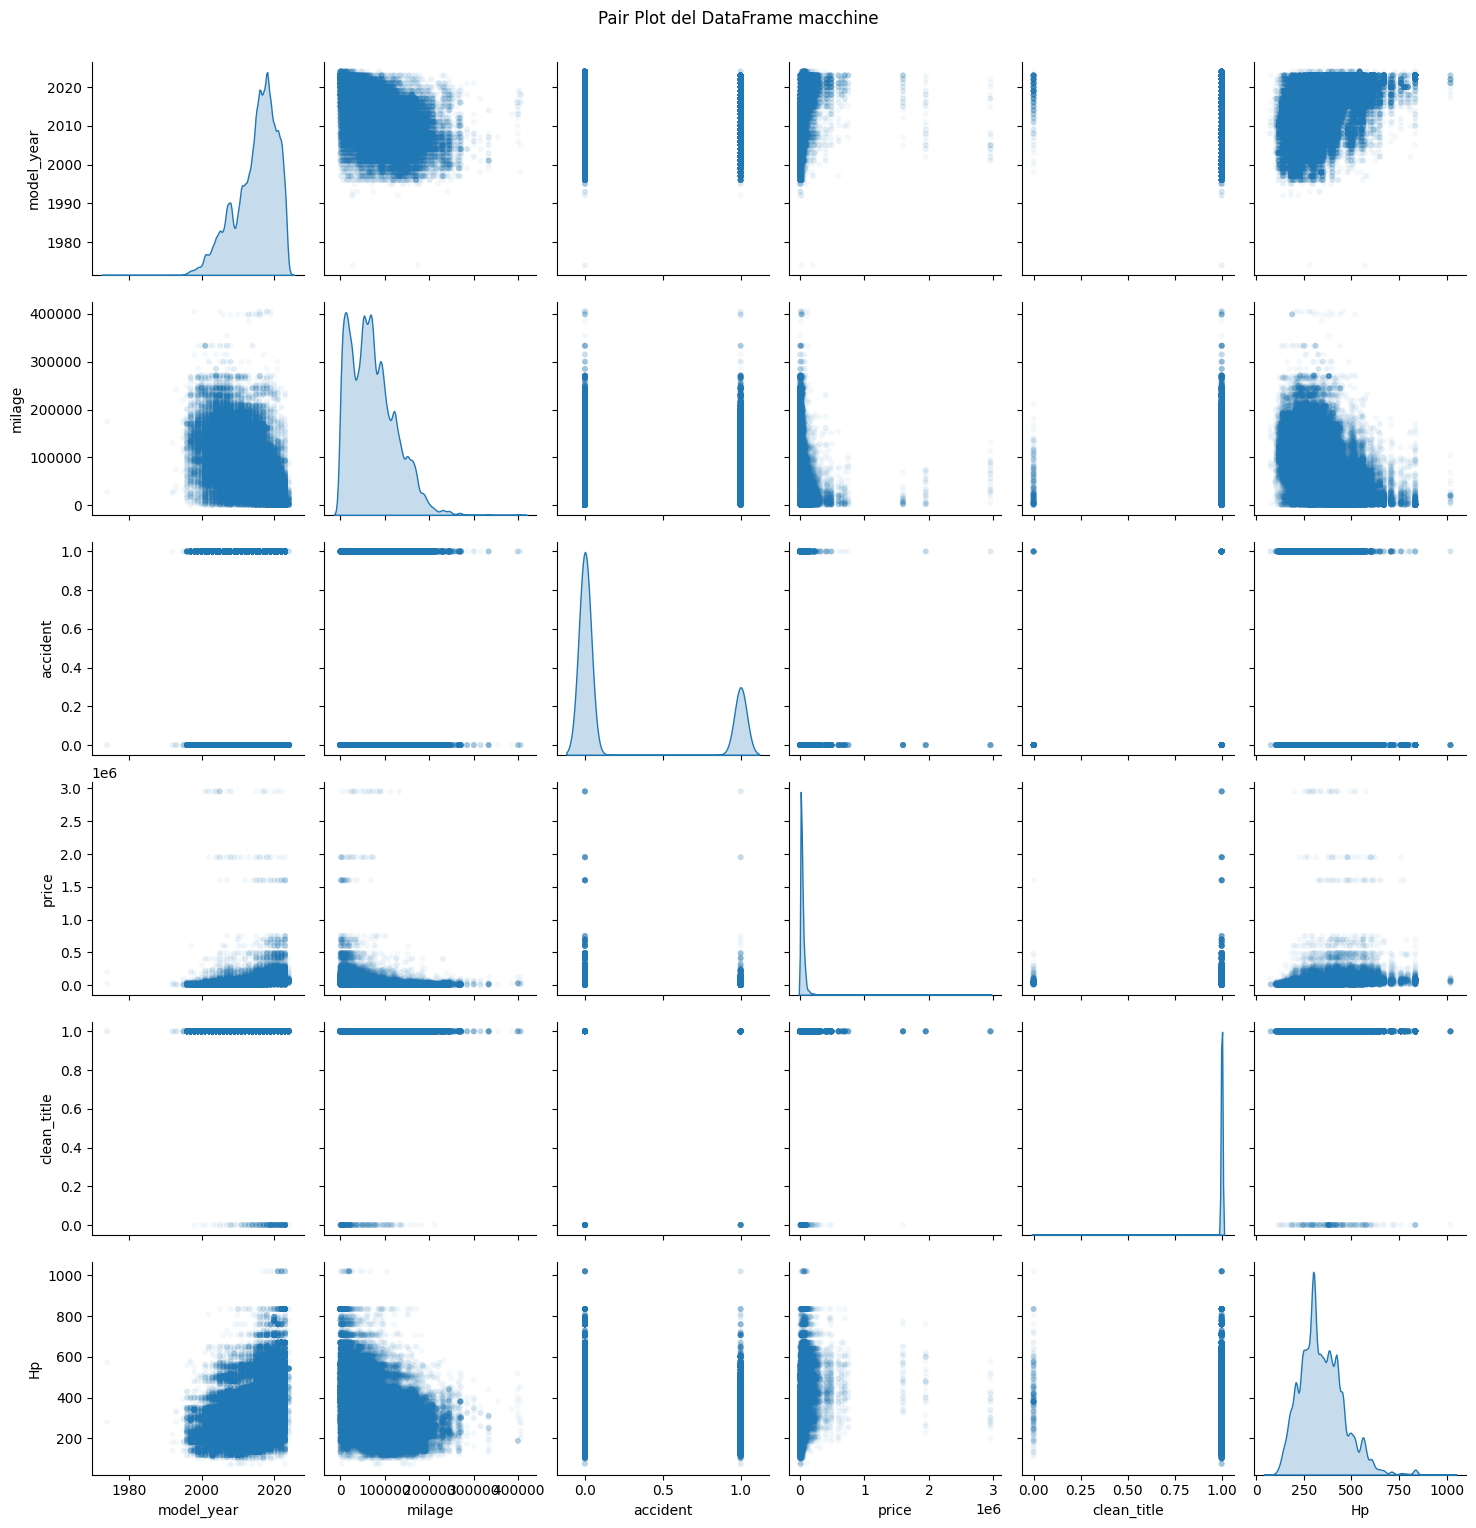

In [190]:
# Selecting relevant features
sns.pairplot(macchine_data[lista], diag_kind='kde', plot_kws={'linewidth': 0, 'size': 0.1, 'alpha': 0.05})
plt.suptitle('Pair Plot del DataFrame macchine', y=1.02)
plt.show()

In [204]:
def check_vintage(riga):
    if riga < 2000:
        return True
    else:
        return False

In [205]:
macchine_data['Vintage'] = macchine_data['model_year'].apply(check_vintage)



In [ ]:

macchine_data['Vintage'] = macchine_data['Vintage'].map({True: 1, False: 0})

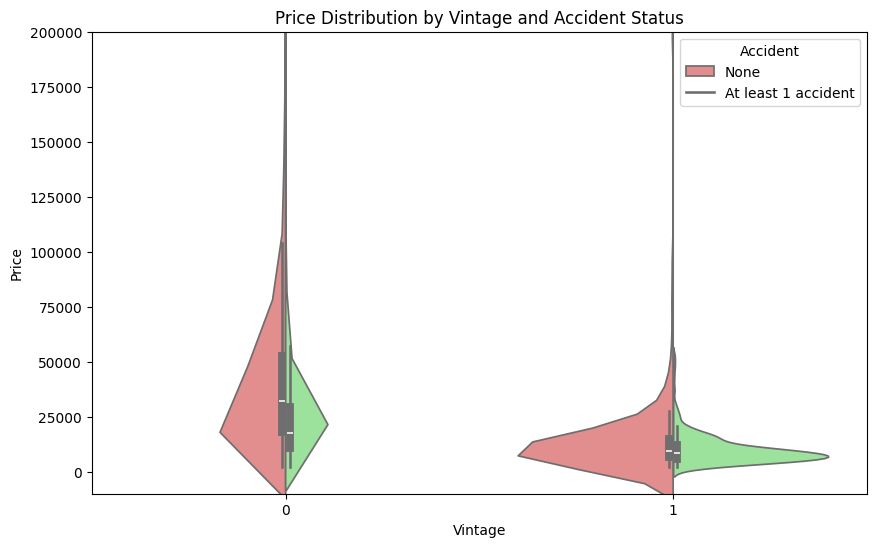

In [ ]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()

#set the y limits

sns.violinplot(x='Vintage', y='price', hue='accident', data=macchine_data, split=True, palette={0:'lightcoral', 1:'lightgreen'},ax= ax1)
ax1.set_ylim(-10000, 200000)
ax1.set_title('Price Distribution by Vintage and Accident Status')
ax1.set_xlabel('Vintage')
ax1.set_ylabel('Price')
ax1.legend(title='Accident', labels=['None', 'At least 1 accident'])


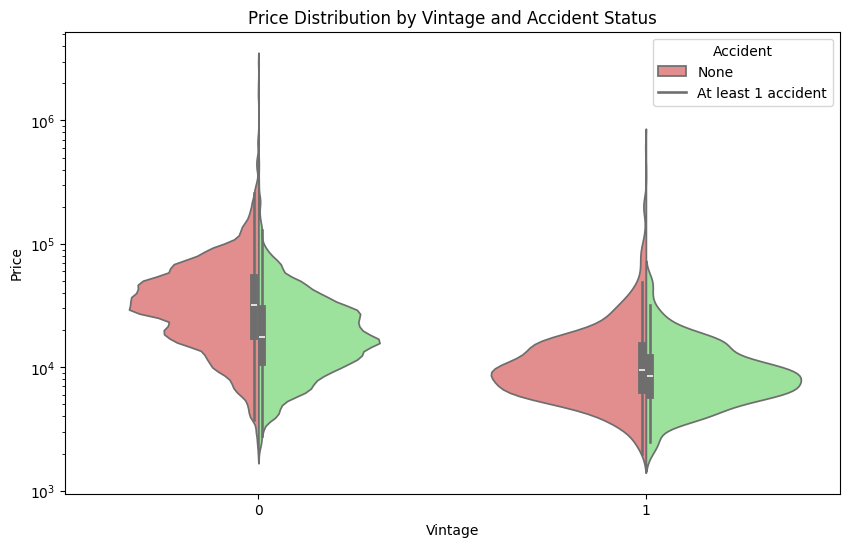

In [215]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()

#set the y limits

sns.violinplot(x='Vintage', y='price', hue='accident', data=macchine_data, split=True, palette={0:'lightcoral', 1:'lightgreen'},ax= ax1, log_scale=10)
ax1.set_title('Price Distribution by Vintage and Accident Status')
ax1.set_xlabel('Vintage')
ax1.set_ylabel('Price')
ax1.legend(title='Accident', labels=['None', 'At least 1 accident'])

In [216]:
def auto_sportiva(riga):
    if riga > 300:
        return True
    else:
        return False

In [217]:
macchine_data['Sportiva'] = macchine_data['Hp'].apply(auto_sportiva)

In [218]:
macchine_data['Sportiva'] = macchine_data['Sportiva'].map({True: 1, False: 0})

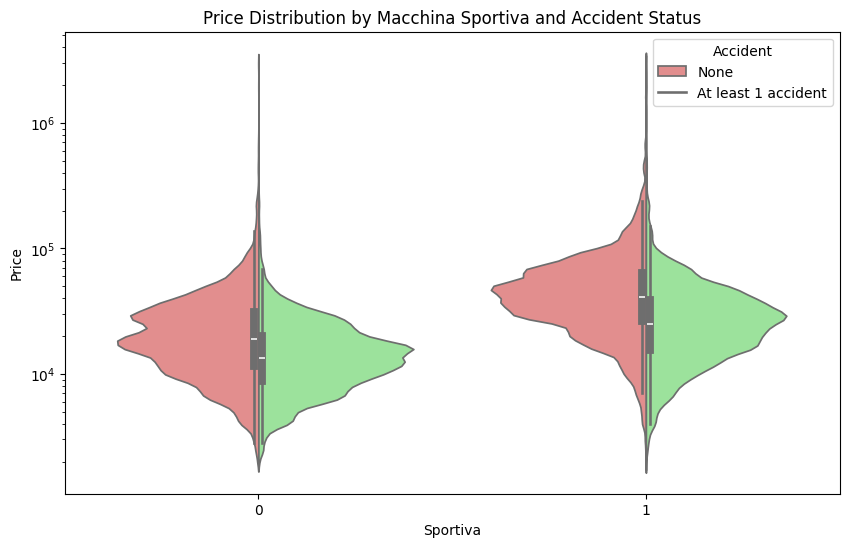

In [ ]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()


sns.violinplot(x='Sportiva', y='price', hue='accident', data=macchine_data, split=True, palette={0:'lightcoral', 1:'lightgreen'},ax= ax1, log_scale=10)
ax1.set_title('Price Distribution by Macchina Sportiva and Accident Status')
ax1.set_xlabel('Sportiva')
ax1.set_ylabel('Price')
ax1.legend(title='Accident', labels=['None', 'At least 1 accident'])

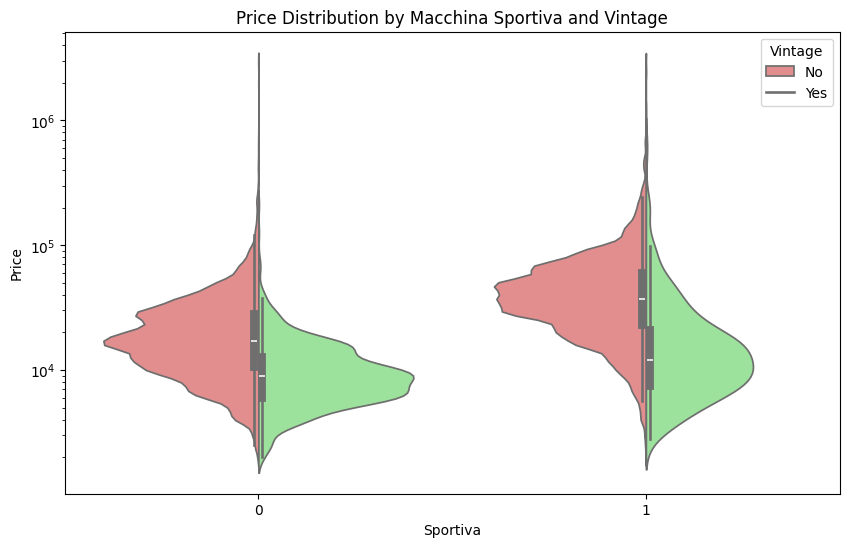

In [220]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()


sns.violinplot(x='Sportiva', y='price', hue='Vintage', data=macchine_data, split=True, palette={0:'lightcoral', 1:'lightgreen'},ax= ax1, log_scale=10)
ax1.set_title('Price Distribution by Macchina Sportiva and Vintage')
ax1.set_xlabel('Sportiva')
ax1.set_ylabel('Price')
ax1.legend(title='Vintage', labels=['No', 'Yes'])

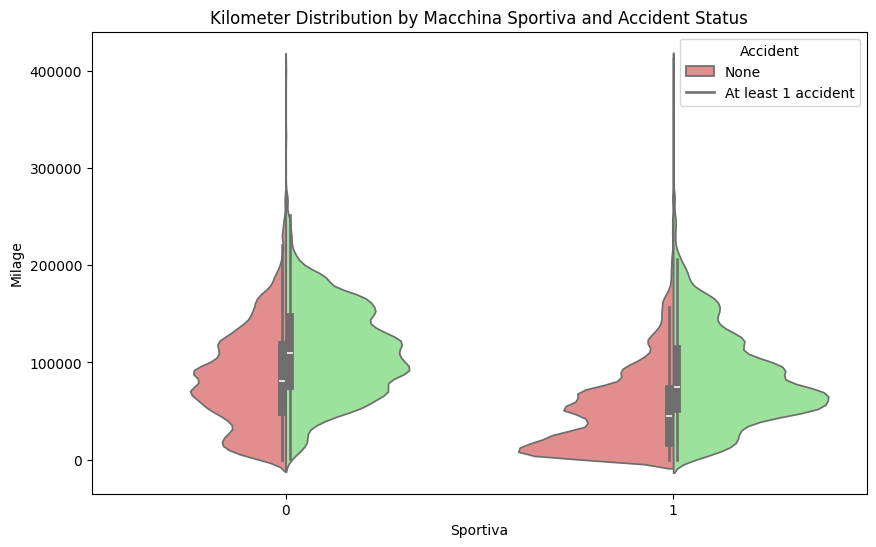

In [223]:
# Plotting
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot()


sns.violinplot(x='Sportiva', y='milage', hue='accident', data=macchine_data, split=True, palette={0:'lightcoral', 1:'lightgreen'},ax= ax1)
ax1.set_title('Kilometer Distribution by Macchina Sportiva and Accident Status')
ax1.set_xlabel('Sportiva')
ax1.set_ylabel('Milage')
ax1.legend(title='Accident', labels=['None', 'At least 1 accident'])